# Importing Data and Pre Processing

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [100]:
!git clone https://github.com/Aabir-creater/Laptop-Price-prediction.git

fatal: destination path 'Laptop-Price-prediction' already exists and is not an empty directory.


In [101]:
df = pd.read_csv('laptop_data.csv')

In [102]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [103]:
df.shape

(1303, 12)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


# Data Cleaning

In [105]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1298    False
1299    False
1300    False
1301    False
1302    False
Length: 1303, dtype: bool

In [106]:
df.duplicated().sum()

0

In [215]:
import missingno as msno
%matplotlib inline

<AxesSubplot:>

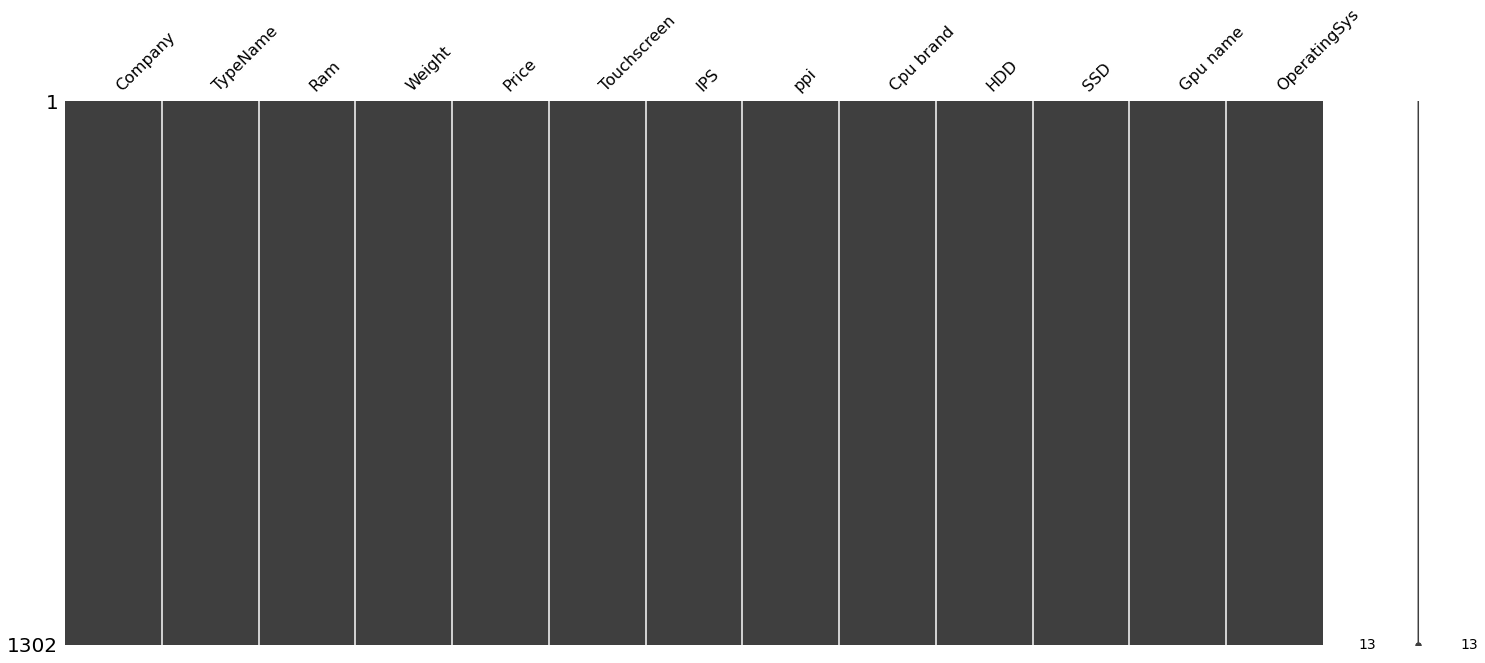

In [216]:
msno.matrix(df)

As we can see from the above matrix there are no null data in our dataset. So there is no need for removing any null values

In [107]:
df.isnull()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,False,False,False,False,False,False,False,False,False,False,False,False
1299,False,False,False,False,False,False,False,False,False,False,False,False
1300,False,False,False,False,False,False,False,False,False,False,False,False
1301,False,False,False,False,False,False,False,False,False,False,False,False


In [108]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [109]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [110]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [111]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [112]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [113]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float64')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


In [115]:
len(df['Memory'].unique())

39

In [116]:
df['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [117]:
df['Memory'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

0       128
1       128
2       256
3       512
4       256
       ... 
1298    128
1299    512
1300     64
1301      1
1302    500
Length: 1303, dtype: int32

# EDA

In [118]:
import seaborn as sns

In [217]:
from scipy.stats import skew

print("Skewness of Price is",df['Price'].skew())

Skewness of Price is 1.5197503994318975


Skewness refers to the amount of asymmetry in the given feature or in other words amount of distortions from the normal distribution.

Here we can observe that the value of skewness is quite high which means that there is a significant large amount of asymmetry.

The peak of the histogram represents the mode i.e the price for which maximum number of laptops were sold

What kind of skewness is present in here?

As the mean of price feature is greater than the median which infact is greater than the mode and the line is flat towards the right in the histogram, so we conclude that the given feature is Positively Skewed. Hence, most of the laptops were sold less than the average price.

C:\Users\aabir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

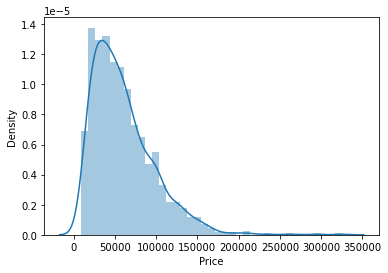

In [119]:
sns.distplot(df['Price'])

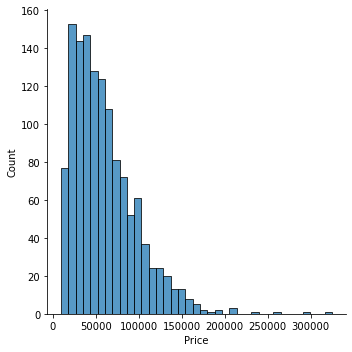

In [120]:
sns.displot(df['Price'])

<AxesSubplot:xlabel='Price', ylabel='Count'>

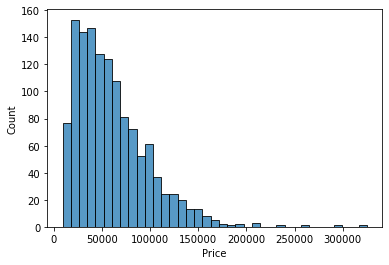

In [121]:
sns.histplot(df['Price'])

# Feature Engineering

<AxesSubplot:>

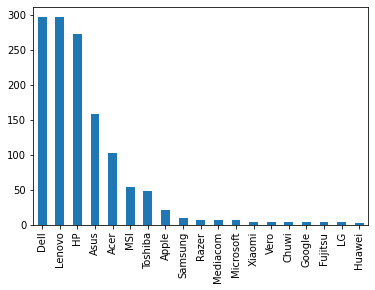

In [122]:
df['Company'].value_counts().plot(kind='bar') #bar graph between x-axis:Company y-axis:Total number of units stored

<AxesSubplot:>

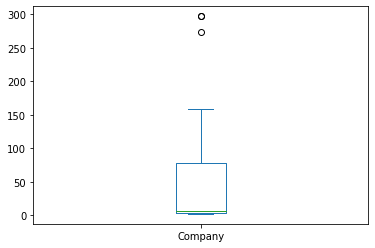

In [123]:
df['Company'].value_counts().plot(kind='box')

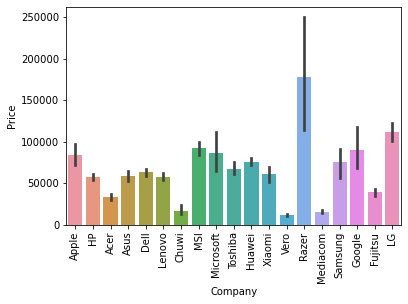

In [124]:
sns.barplot(x=df['Company'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:>

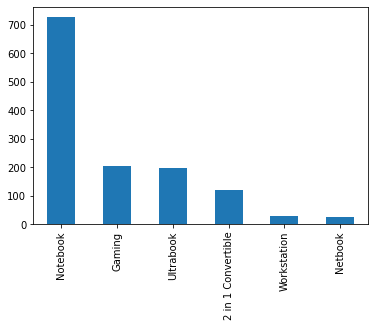

In [125]:
df['TypeName'].value_counts().plot(kind = 'bar')

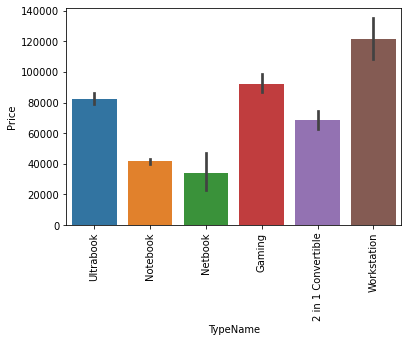

In [126]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\aabir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

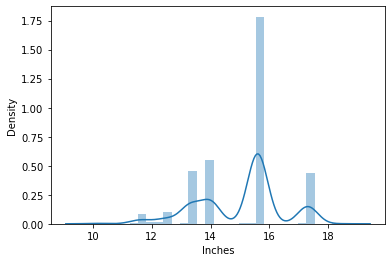

In [127]:
#df['Inches'].value_counts().plot(kind = 'bar')
sns.distplot(df['Inches'])

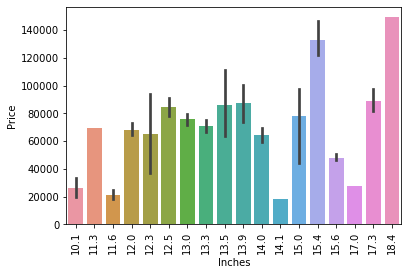

In [128]:
sns.barplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='Inches', ylabel='Price'>

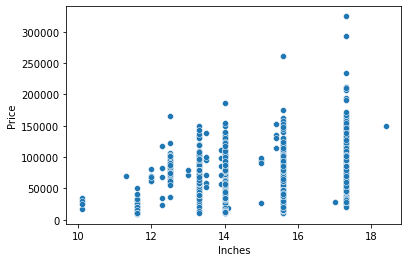

In [129]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [130]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [131]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [132]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
395,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,26586.72,0
389,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.42,133679.52,1
950,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,8,8GB SSD,Nvidia Quadro M1000M,Windows 10,2.00,119826.72,0
181,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23,74538.72,0
1084,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,39960.00,0


<AxesSubplot:>

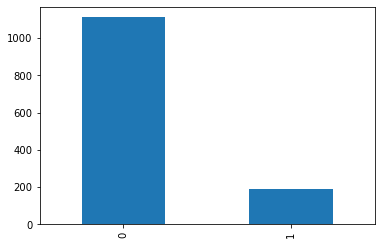

In [133]:
df['Touchscreen'].value_counts().plot(kind ='bar')

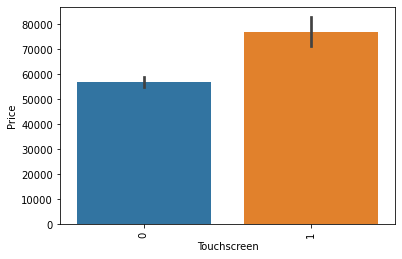

In [134]:
sns.barplot(x=df['Touchscreen'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [135]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [136]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS
1212,MSI,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.43,103842.1872,0,1
1241,Asus,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.45,68198.4000,0,0
1091,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.86,18434.3472,0,0
944,Lenovo,2 in 1 Convertible,11.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core M m7-6Y75 1.2GHz,8,256GB SSD,Intel HD Graphics 515,Windows 10,1.10,69210.7200,1,1
908,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 6300HQ 2.3GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,42037.9200,0,1


<AxesSubplot:>

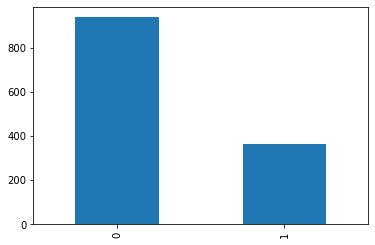

In [137]:
df['IPS'].value_counts().plot(kind='bar')

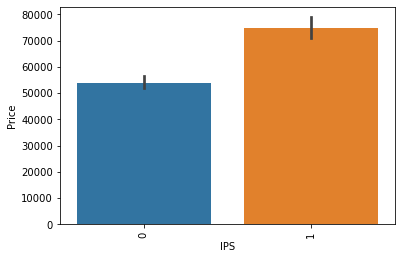

In [138]:
sns.barplot(x = df['IPS'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [139]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [140]:
new.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [141]:
df['x_res'] = new[0]
df['y_res'] = new[1]

In [142]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [143]:
df['x_res'] = df['x_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,x_res,y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [144]:
df['x_res'] = df['x_res'].astype('int32')
df['y_res'] = df['y_res'].astype('int32')

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  x_res             1303 non-null   int32  
 14  y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [146]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
Name: Price, dtype: float64

In [147]:
df['ppi'] = (((df['x_res']**2) + (df['y_res']**2))**0.50) / df['Inches'].astype('float32') 
#Formula ppi = sqrt((x resolution)^2 + (y resolution)^2)/inches

In [148]:
df.corr()['Price']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
x_res          0.556529
y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64

In [149]:
df.drop(columns = ['ScreenResolution', 'x_res', 'y_res', 'Inches'], inplace = True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001


In [150]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [151]:
df['Cpu name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [152]:
def extract_processor(text):
  if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
    return text

  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Procerror'
    else:
      return 'AMD Processor'

In [153]:
df['Cpu brand'] = df['Cpu name'].apply(extract_processor)

In [154]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,Intel Core i5


<AxesSubplot:>

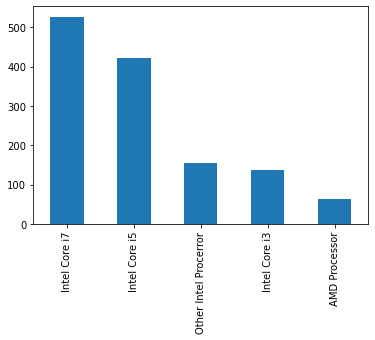

In [155]:
df['Cpu brand'].value_counts().plot(kind = 'bar')

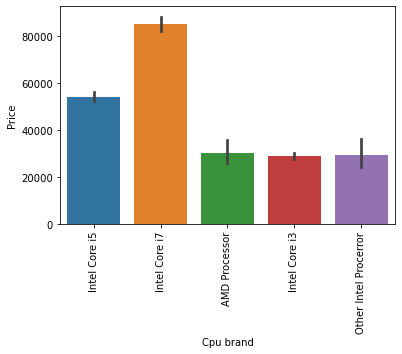

In [156]:
sns.barplot(x = df['Cpu brand'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [157]:
df.drop(columns=['Cpu','Cpu name'], inplace=True)

In [158]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5


<AxesSubplot:>

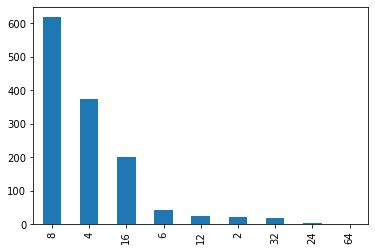

In [159]:
df['Ram'].value_counts().plot(kind = 'bar')

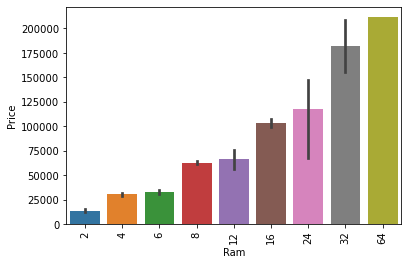

In [160]:
sns.barplot(x = df['Ram'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [161]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [162]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')

new = df['Memory'].str.split('+', n=1, expand=True)


df["first"] = new[0]
df["first"] = df["first"].str.strip()


df['HDDLayer1'] = df['first'].apply(lambda x: 1 if "HDD" in x else 0)
df['SSDLayer1'] = df['first'].apply(lambda x: 1 if "SSD" in x else 0)
df['Hybrid1'] = df['first'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['FlashStorage1'] = df['first'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D','')

df["second"] = new[1]
df["second"] = df["second"].fillna('0', inplace = False)
df["second"] = df["second"].str.strip()


df['HDDLayer2'] = df['second'].apply(lambda x: 1 if "HDD" in x else 0)
df['SSDLayer2'] = df['second'].apply(lambda x: 1 if "SSD" in x else 0)
df['Hybrid2'] = df['second'].apply(lambda x: 1 if "Hybrid" in x else 0)
df['FlashStorage2'] = df['second'].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D','')

df['first'] = df['first'].astype('int')
df['second'] = df['second'].astype('int')

df['HDD'] = ((df['HDDLayer1']*df['first']) + (df['HDDLayer2']*df['second']))
df['SSD'] = ((df['SSDLayer1']*df['first']) + (df['SSDLayer2']*df['second']))
df['Hybrid'] = ((df['Hybrid1']*df['first']) + (df['Hybrid2']*df['second']))
df['Flash Storage'] = ((df['FlashStorage1']*df['first']) + (df['FlashStorage2']*df['second']))

df.drop(columns = ['first','second','HDDLayer1','SSDLayer1','Hybrid1','FlashStorage1','HDDLayer2','SSDLayer2','Hybrid2','FlashStorage2'], inplace = True)


df.head(10)

C:\Users\aabir\AppData\Local\Temp\ipykernel_21148\3273234506.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')
C:\Users\aabir\AppData\Local\Temp\ipykernel_21148\3273234506.py:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D','')


,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,0,0
5,Acer,Notebook,4,500 HDD,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454667,AMD Processor,500,0,0,0
6,Apple,Ultrabook,16,256 Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534629,Intel Core i7,0,0,0,256
7,Apple,Ultrabook,8,256 Flash Storage,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677938,Intel Core i5,0,0,0,256
8,Asus,Ultrabook,16,512 SSD,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512,0,0
9,Acer,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256,0,0


In [163]:
df = df.drop(columns = 'Memory', inplace = False)

In [164]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,0,0


In [165]:
df.corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash Storage   -0.040511
Name: Price, dtype: float64

In [166]:
df.drop(columns = ['Hybrid','Flash Storage'], inplace = True)

In [167]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256


In [168]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [169]:
df['Gpu name'] = df['Gpu'].apply(lambda x:x.split()[0])

In [170]:
df['Gpu name'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu name, dtype: int64

In [171]:
df = df[df['Gpu name'] != 'ARM']   #only 1 record is available so we don't need the data 

In [172]:
df['Gpu name'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu name, dtype: int64

<AxesSubplot:>

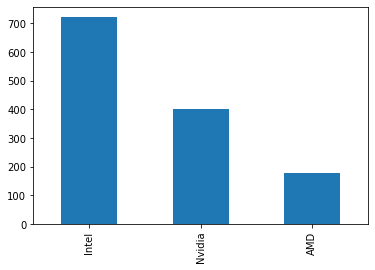

In [173]:
df['Gpu name'].value_counts().plot(kind = 'bar')

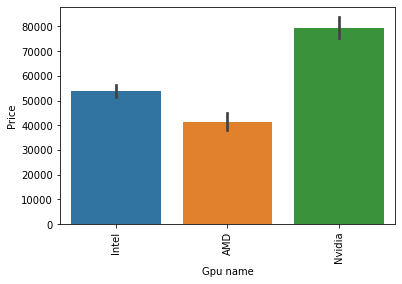

In [174]:
sns.barplot(x = df['Gpu name'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [175]:
df.drop(columns = ['Gpu'], inplace = True)

In [176]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu name
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel


<AxesSubplot:>

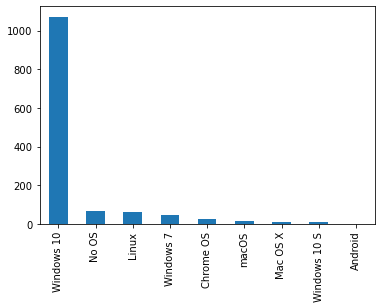

In [177]:
df['OpSys'].value_counts().plot(kind = 'bar')

In [178]:
def capture_OS(text):
  if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
    text = 'Windows'
  elif text == 'macOS' or text == 'Mac OS X':
    text = 'Mac'
  else:
    text = 'No OS/Linux/Other'
  
  return text

In [179]:
df['OperatingSys'] = df['OpSys'].apply(capture_OS)

In [180]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu name,OperatingSys
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983001,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211995,Intel Core i5,0,256,Intel,No OS/Linux/Other
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534629,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983001,Intel Core i5,0,256,Intel,Mac


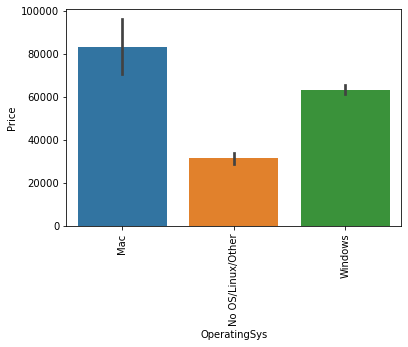

In [181]:
sns.barplot(x = df['OperatingSys'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [182]:
df.drop(columns = ['OpSys'], inplace = True)

C:\Users\aabir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

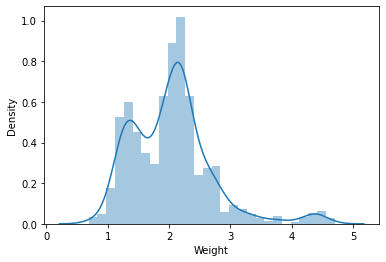

In [183]:
sns.distplot(df['Weight'])

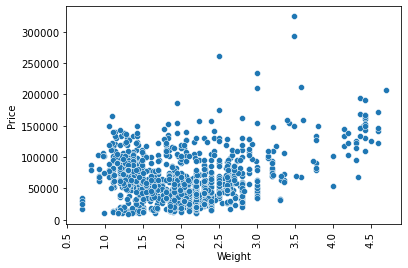

In [184]:
sns.scatterplot(x = df['Weight'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [185]:
df.corr()['Price']

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
IPS            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<AxesSubplot:>

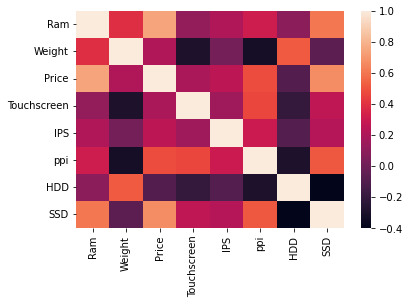

In [186]:
sns.heatmap(df.corr())

C:\Users\aabir\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

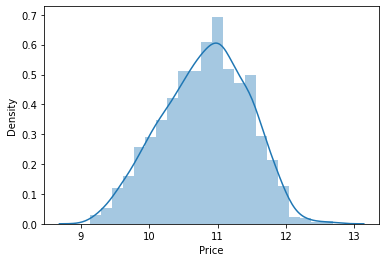

In [187]:
sns.distplot(np.log(df['Price']))

In [188]:
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])

In [189]:
X.head()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu name,OperatingSys
0,Apple,Ultrabook,8,1.37,0,1,226.983001,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677938,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211995,Intel Core i5,0,256,Intel,No OS/Linux/Other
3,Apple,Ultrabook,16,1.83,0,1,220.534629,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983001,Intel Core i5,0,256,Intel,Mac


In [190]:
y.head()

0    11.175755
1    10.776777
2    10.329931
3    11.814476
4    11.473101
Name: Price, dtype: float64

# Modeling

In [191]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [192]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu name,OperatingSys
183,Toshiba,Notebook,8,2.00,0,0,100.454667,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211995,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094207,Other Intel Procerror,0,0,Intel,No OS/Linux/Other
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211995,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211995,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454667,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211995,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454667,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454667,Intel Core i3,2000,0,Nvidia,No OS/Linux/Other


In [193]:
X_test

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu name,OperatingSys
248,HP,Notebook,4,1.49,0,1,165.632116,Intel Core i5,500,0,Intel,Windows
555,Asus,Notebook,4,2.00,0,0,100.454667,Other Intel Procerror,500,0,Intel,No OS/Linux/Other
1251,HP,Notebook,4,1.86,0,0,100.454667,AMD Processor,500,0,AMD,Windows
547,Lenovo,Notebook,4,2.15,0,0,141.211995,Intel Core i5,1000,0,Intel,No OS/Linux/Other
885,HP,2 in 1 Convertible,4,1.28,1,0,165.632116,Intel Core i5,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
1129,HP,Gaming,8,3.35,0,1,127.335680,Intel Core i5,1000,128,Nvidia,Windows
172,Lenovo,Notebook,4,2.20,0,0,100.454667,AMD Processor,500,0,AMD,No OS/Linux/Other
322,Asus,Notebook,8,2.00,0,0,157.350512,Intel Core i7,0,256,Intel,Windows
996,HP,Ultrabook,8,1.11,1,1,165.632116,Intel Core i7,0,256,Intel,Windows


In [194]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

In [195]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Linear Regression

In [196]:
step1 = ColumnTransformer(transformers = [
        ('column_tranform', OneHotEncoder(sparse = False, drop ='first'),[0,1,7,10,11])],
        remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
                 ('step1',step1),
                 ('step2',step2)
])

pipe.fit(X_train, y_train)

y_predict = pipe.predict(X_test)

print('R2 Score', r2_score(y_test,y_predict))
print('MAE', mean_absolute_error(y_test,y_predict))

R2 Score 0.8073277480210157
MAE 0.21017827889856913


# Ridge Regression

In [197]:
step1 = ColumnTransformer(transformers = [
        ('column_trasform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])
], remainder='passthrough')

step2 = Ridge(alpha = 10)

pipe = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe.fit(X_train, y_train)

y_predict = pipe.predict(X_test)

print('R2 score', r2_score(y_test,y_predict))
print('MAE', mean_absolute_error(y_test,y_predict))

R2 score 0.8127331058876714
MAE 0.2092680216675988


# Lasso Regression

In [198]:
step1 = ColumnTransformer( transformers = [
      ('column_transform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])],
      remainder = 'passthrough'
)

step2 = Lasso(alpha = 0.001)

pipe = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)

print('r2 score', r2_score(y_test, y_predict))
print('MAE', mean_absolute_error(y_test, y_predict))

r2 score 0.8071853976971413
MAE 0.2111436149535389


# KNN 

In [199]:
step1 = ColumnTransformer( transformers = [
      ('column_transform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])],
      remainder = 'passthrough'
)

step2 = KNeighborsRegressor(n_neighbors = 3)

pipe = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)

print('r2 score', r2_score(y_test, y_predict))
print('MAE', mean_absolute_error(y_test, y_predict))

r2 score 0.8018782788293886
MAE 0.19373597880866317


# Decision Tree 

In [200]:
step1 = ColumnTransformer( transformers = [
      ('column_transform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])],
      remainder = 'passthrough'
)

step2 = DecisionTreeRegressor(max_depth = 8)

pipe = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)

print('r2 score', r2_score(y_test, y_predict))
print('MAE', mean_absolute_error(y_test, y_predict))

r2 score 0.8412242949469485
MAE 0.18127146637771685


# Random Forest Regression



In [201]:
step1 = ColumnTransformer( transformers = [
      ('column_transform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])],
      remainder = 'passthrough'
)

step2 = RandomForestRegressor(n_estimators = 100,
                              random_state = 3,
                              max_depth = 15,
                              max_samples= 0.5,
                              max_features = 0.75)

pipe = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)

print('r2 score', r2_score(y_test, y_predict))
print('MAE', mean_absolute_error(y_test, y_predict))

r2 score 0.8873402378382488
MAE 0.15860130110457718


# Gradient Boosting Regressor

In [202]:
step1 = ColumnTransformer( transformers = [
      ('column_transform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])],
      remainder = 'passthrough'
)

step2 = GradientBoostingRegressor(n_estimators = 500)

pipe = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)

print('r2 score', r2_score(y_test, y_predict))
print('MAE', mean_absolute_error(y_test, y_predict))

r2 score 0.8820999904454195
MAE 0.15928344906035993


# Extra Tree Regressor

In [203]:
step1 = ColumnTransformer( transformers = [
      ('column_transform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])],
      remainder = 'passthrough'
)

step2 = RandomForestRegressor(n_estimators = 100,
                              random_state = 3,
                              max_depth = 15,
                              max_samples= 0.5,
                              max_features = 0.75)

pipe = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)

print('r2 score', r2_score(y_test, y_predict))
print('MAE', mean_absolute_error(y_test, y_predict))

r2 score 0.8873402378382488
MAE 0.15860130110457718


# ADA Boost Regressor

In [204]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7853201341551919
MAE 0.230772055198841


# SVM

In [210]:
step1 = ColumnTransformer(transformers = [
        ('column_tranform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])],
        remainder = 'passthrough'
)

#step2 = SVR(kernel = 'poly', C = 1000, epsilon = 0.1)
step2 = SVR(kernel = 'rbf', C = 1000, epsilon = 0.1)

pipe = Pipeline([
          ('step1',step1),
          ('step2',step2)
])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)

print('r2 score', r2_score(y_test, y_predict))
print('MAE', mean_absolute_error(y_test, y_predict))

r2 score 0.7691849467901006
MAE 0.2326962982862536


# XGBoost

In [206]:
step1 = ColumnTransformer( transformers = [
      ('column_transform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])],
      remainder = 'passthrough'
)

step2 = XGBRegressor(n_estimators = 25,
                              learning_rate = 0.3,
                              max_depth = 10,
                              )

pipe = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)

print('r2 score', r2_score(y_test, y_predict))
print('MAE', mean_absolute_error(y_test, y_predict))

r2 score 0.8955678039390171
MAE 0.1508490868090073


# Voting Regressor

In [207]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer( transformers = [
      ('column_transform',OneHotEncoder(sparse = False, drop = 'first'),[0,1,7,10,11])],
      remainder = 'passthrough'
)


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15,bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=10)
et = ExtraTreesRegressor(n_estimators=400,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[7,1,7,1])

pipe = Pipeline([
      ('step1',step1),
      ('step2',step2)
])

pipe.fit(X_train,y_train)

y_predict = pipe.predict(X_test)

print('r2 score', r2_score(y_test, y_predict))
print('MAE', mean_absolute_error(y_test, y_predict))

r2 score 0.9003464021924359
MAE 0.14783131261030133


# Stacking

In [208]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=10))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8924529306641125
MAE 0.15642877548412176


In [211]:
import pickle

In [212]:
pickle.dump(df,open('df.pkl','wb'))

In [213]:
pickle.dump(pipe,open('pipe.pkl','wb'))